<a href="https://colab.research.google.com/github/MoomtahinaRa/FODS/blob/main/FODS_assessment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#descriptive analysis
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the datasets
demographics_df = pd.read_csv('/content/drive/MyDrive/FODS/dataset1.csv')
screen_time_df = pd.read_csv('/content/drive/MyDrive/FODS/dataset2.csv')
wellbeing_df = pd.read_csv('/content/drive/MyDrive/FODS/dataset3.csv')

# Merge the datasets on 'ID'
merged_df = pd.merge(pd.merge(demographics_df, screen_time_df, on='ID'), wellbeing_df, on='ID')


Mounted at /content/drive


In [ ]:
# Display the first few rows of the merged dataset to check if it's loaded correctly
print(merged_df.head())


        ID  gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  \
0  1087192       0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   
1  1087195       0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   
2  1087205       0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   
3  1087214       0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   
4  1087222       0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   

   ...  Engs  Dealpr  Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  \
0  ...     4       4       4       4      5     4       4      5       4   
1  ...     3       4       5       3      5     4       4      5       4   
2  ...     3       3       3       3      4     3       3      3       4   
3  ...     4       4       4       4      3     5       4      5       4   
4  ...     2       3       3       4      4     3       5      5       5   

   Cheer  
0      4  
1      4  
2      4  
3      4  
4      5  

[5 rows

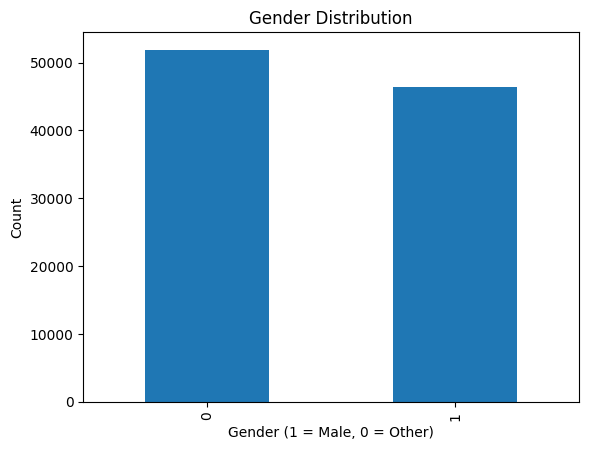

In [ ]:
# --- Demographic Analysis ---

# Plot gender distribution
merged_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = Male, 0 = Other)')
plt.ylabel('Count')
plt.show()



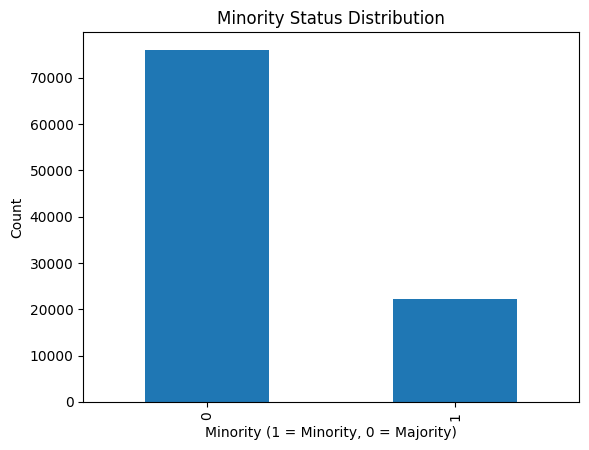

In [ ]:
# Plot minority distribution
merged_df['minority'].value_counts().plot(kind='bar')
plt.title('Minority Status Distribution')
plt.xlabel('Minority (1 = Minority, 0 = Majority)')
plt.ylabel('Count')
plt.show()


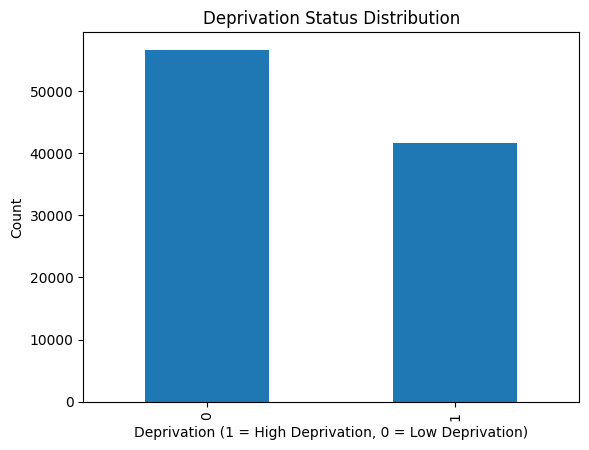

In [ ]:
# Plot deprivation status
merged_df['deprived'].value_counts().plot(kind='bar')
plt.title('Deprivation Status Distribution')
plt.xlabel('Deprivation (1 = High Deprivation, 0 = Low Deprivation)')
plt.ylabel('Count')
plt.show()


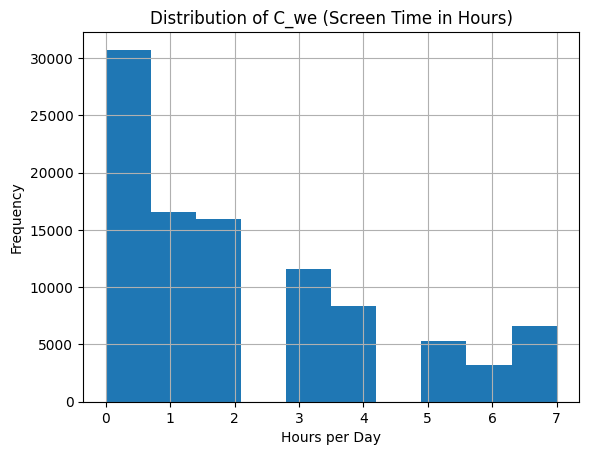

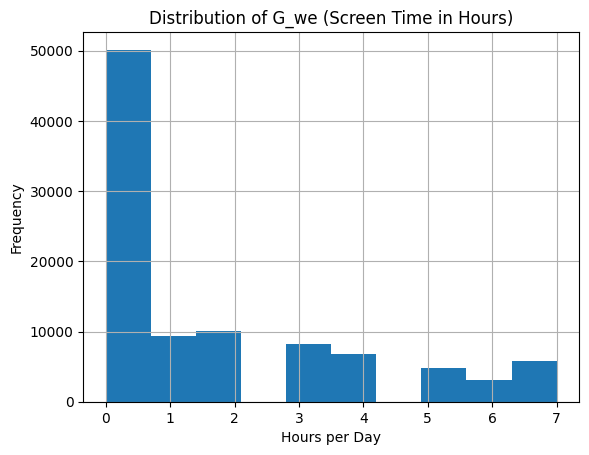

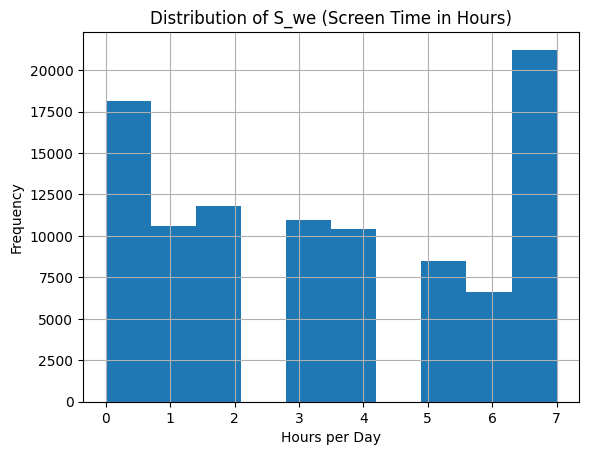

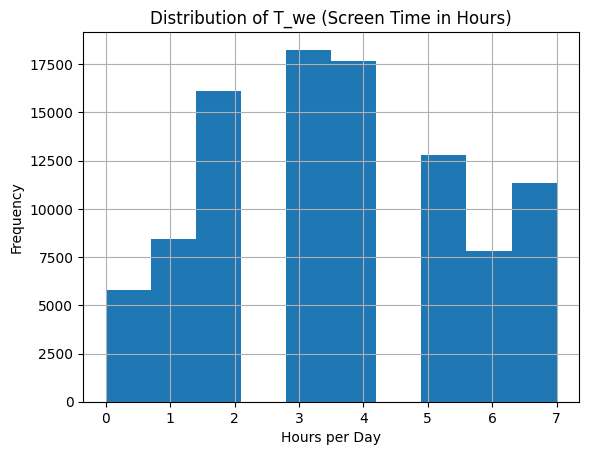

In [ ]:
# --- Digital Screen Time Analysis ---

# Plot histograms for different screen time variables
screen_time_columns = ['C_we', 'G_we', 'S_we', 'T_we']
for col in screen_time_columns:
    merged_df[col].hist(bins=10)
    plt.title(f'Distribution of {col} (Screen Time in Hours)')
    plt.xlabel('Hours per Day')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
#INFERENTIAL ANALYSIS

# Import necessary libraries for statistical analysis
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

# --- Hypothesis Testing: High vs. Low Screen Time ---

# Define high and low screen time groups based on median screen time
high_screen_time = merged_df[merged_df['C_we'] > merged_df['C_we'].median()]['Optm']
low_screen_time = merged_df[merged_df['C_we'] <= merged_df['C_we'].median()]['Optm']

In [ ]:
# Perform t-test
t_stat, p_val = ttest_ind(high_screen_time, low_screen_time)
print('T-Statistic:', t_stat)
print('P-Value:', p_val)

T-Statistic: -5.440303544834637
P-Value: 5.331641980160876e-08


In [ ]:
# Interpretation of Results
if p_val < 0.05:
    print("There is a significant difference in optimism scores between high and low screen time users.")
else:
    print("There is no significant difference in optimism scores between high and low screen time users.")



There is a significant difference in optimism scores between high and low screen time users.


In [ ]:
# --- Regression Analysis: Screen Time and Well-being ---

# Prepare data for regression (independent and dependent variables)
X = merged_df[['C_we', 'G_we', 'S_we', 'T_we']]  # Screen time variables
y = merged_df['Optm']  # Dependent variable (optimism score)

In [ ]:
# Fit the regression model
model = LinearRegression().fit(X, y)

In [ ]:
# Output the regression results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.00326704 -0.01164143 -0.02478396 -0.01336158]
Intercept: 3.4397787170991885


In [ ]:
# Interpretation of Coefficients
for idx, col in enumerate(X.columns):
    print(f"Impact of {col} on optimism score: {model.coef_[idx]:.4f}")


Impact of C_we on optimism score: -0.0033
Impact of G_we on optimism score: -0.0116
Impact of S_we on optimism score: -0.0248
Impact of T_we on optimism score: -0.0134
